In [1]:
library(tidyverse)
ggplot2::theme_set(theme_bw())

library(showtext)
font_add("nanum", "NanumGothic.ttf")
showtext_auto()

setwd("C:/Soongsil/R/Textmining")

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5.9000     v purrr   0.3.4     
v tibble  3.1.6          v dplyr   1.0.8     
v tidyr   1.2.0          v stringr 1.4.0     
v readr   2.1.2          v forcats 0.5.1     

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: sysfonts

Loading required package: showtextdb



### 02-01 형태소 분석

In [2]:
library(KoNLP)

Checking user defined dictionary!




### 형태소 사전 설정

In [3]:
useNIADic()

Backup was just finished!
1213109 words dictionary was built.


### ```extractNoun()``` : 명사 추출
- list 형태로 출력

In [4]:
text <- tibble(
    value = c("대한민국은 민주공화국이다.",
             "대한민국의 주권은 국민에게 잇고, 모든 권력은 국민으로부터 나온다.")
)
text

value
<chr>
대한민국은 민주공화국이다.
"대한민국의 주권은 국민에게 잇고, 모든 권력은 국민으로부터 나온다."


In [5]:
extractNoun(text$value)

[[1]]
[1] "대한민국"   "민주공화국"

[[2]]
[1] "대한민국" "주권"     "국민"     "권력"     "국민"

### ```unnest_tokens()```에 ```extractNoun``` 적용 : tibble 구조로 출력

In [6]:
library(tidytext)
text %>% unnest_tokens(input = value,
                      output = word,
                      token = extractNoun)

word
<chr>
대한민국
민주공화국
대한민국
주권
국민
권력
국민


In [8]:
raw_moon <- readLines("speech_moon.txt", encoding = "UTF-8")

moon <- raw_moon %>%
  str_replace_all("[^가-힣]", " ") %>%  
  str_squish() %>%                     
  as_tibble()   

In [9]:
word_noun <- moon %>%
  unnest_tokens(input = value,
                output = word,
                token = extractNoun)

word_noun %>% print

# A tibble: 1,757 x 1
   word      
   <chr>     
 1 "정권교체"
 2 "하겠습니"
 3 "정치"    
 4 "교체"    
 5 "하겠습니"
 6 "시대"    
 7 "교체"    
 8 "하겠습니"
 9 ""        
10 "불비불명"
# ... with 1,747 more rows


### 02-02 명사 빈도 분석

In [10]:
word_noun <- word_noun %>%
  count(word, sort = T) %>%    
  filter(str_count(word) > 1)

top20 <- word_noun %>%
  head(20)

In [11]:
top20 %>% print

# A tibble: 20 x 2
   word         n
   <chr>    <int>
 1 국민        21
 2 일자리      21
 3 나라        19
 4 우리        17
 5 경제        15
 6 사회        14
 7 성장        13
 8 대통령      12
 9 정치        12
10 하게        12
11 대한민국    11
12 평화        11
13 복지        10
14 우리나라    10
15 확대        10
16 들이         9
17 사람         9
18 산업         9
19 정부         9
20 복지국가     8


In [21]:
font_add_google(name = "Nanum Gothic", family = "nanumgothic")
showtext_auto()

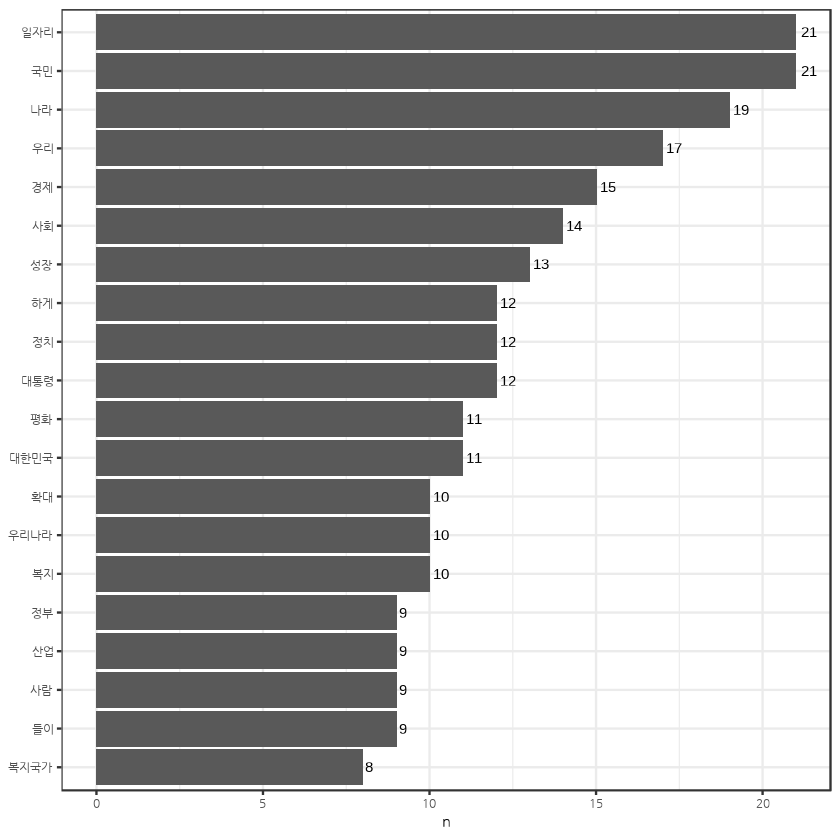

In [25]:
ggplot(top20) + geom_col(aes(fct_reorder(word, n), n)) + coord_flip() +
    geom_text(aes(word, n, label = n), hjust = -0.3) + 
    theme(text = element_text(family = "nanumgothic"),
         axis.title.y = element_blank())

### 02-03 특정 단어가 사용된 문장

In [26]:
sentences_moon <- raw_moon %>%
    str_squish() %>%
    as_tibble() %>%
    unnest_tokens(input = value,
                 output = sentence,
                 token = "sentences")

sentences_moon %>% print

# A tibble: 207 x 1
   sentence                                                               
   <chr>                                                                  
 1 정권교체 하겠습니다!                                                   
 2 정치교체 하겠습니다!                                                   
 3 시대교체 하겠습니다!                                                   
 4 ‘불비불명(不飛不鳴)’이라는 고사가 있습니다.                            
 5 남쪽 언덕 나뭇가지에 앉아, 3년 동안 날지도 울지도 않는 새.             
 6 그러나 그 새는 한번 날면 하늘 끝까지 날고, 한번 울면 천지를 뒤흔듭니다.
 7 그 동안 정치와 거리를 둬 왔습니다.                                     
 8 그러나 암울한 시대가 저를 정치로 불러냈습니다.                         
 9 더 이상 남쪽 나뭇가지에 머무를 수 없었습니다.                          
10 이제 저는 국민과 함께 높이 날고 크게 울겠습니다.                       
# ... with 197 more rows


### ```str_detect()``` : 특정 단어가 포함된지 확인

In [27]:
str_detect("치킨은 맛있다", "치킨")

[1] TRUE

In [28]:
sentences_moon %>%
    filter(str_detect(sentence, "국민")) %>% print

# A tibble: 19 x 1
   sentence                                                                     
   <chr>                                                                        
 1 이제 저는 국민과 함께 높이 날고 크게 울겠습니다.                             
 2 오늘 저는 제18대 대통령선거 출마를 국민 앞에 엄숙히 선언합니다.              
 3 존경하는 국민 여러분!                                                        
 4 국민이 모두 아픕니다.                                                        
 5 국민 한 사람 한 사람이 모두 아픕니다.                                        
 6 국민들에게 희망을 주는 정치가 절실하게 필요합니다.                           
 7 국민의 뜻이 대통령의 길입니다.                                               
 8 저는 대선출마를 결심하고 국민 여러분께 출마선언문을 함께 쓰자고 제안 드렸습~ 
 9 시민의 한숨과 눈물을 닦아주지 못하는 정치가 있었고, 오히려 국민의 걱정거리가~
10 상식이 통하는 사회, 권한과 책임이 비례하는 사회, 다름을 인정하는 세상, 개천~ 
11 그러나 거창하게만 들리는 이 국가비전 역시 국민의 마음속에 있었습니다.        
12 더욱 낮아지고 겸손해져서 국민의 마음속으로 들어가라.                         
13 국민들이 제게 준 가르침입니다.                                               
14 국민의 뜻에서 대통령의 길을 찾겠습니다.                  

In [29]:
sentences_moon %>%
    filter(str_detect(sentence, "일자리")) %>% print

# A tibble: 18 x 1
   sentence                                                                     
   <chr>                                                                        
 1 빚 갚기 힘들어서, 아이 키우기 힘들어서, 일자리가 보이지 않아서 아픕니다.     
 2 상생과 평화의 대한민국은 공평과 정의에 바탕을 두고, 성장의 과실을 함께 누리~ 
 3 복지의 확대를 통해 보육, 교육, 의료, 요양 등 사회서비스 부문에 수많은 일자리~
 4 결국 복지국가로 가는 길은 사람에 대한 투자, 일자리 창출, 자영업 고통 경감, ~ 
 5 ‘일자리 정부’로 ‘일자리 혁명’을 이루겠습니다.                                
 6 복지의 확대와 함께 저는 강력한 ‘일자리 혁명’을 이루고자 합니다.              
 7 지금 너무나 많은 젊은이들과 실업자, 비정규직 종사자, 근로능력이 있는 고령자~ 
 8 좋은 일자리 창출을 위해 비정규직의 정규직 전환 촉진, 비정규직에 대한 차별철~ 
 9 또한 정보통신 산업, 바이오산업, 나노 산업, 신재생에너지 산업, 문화산업과 콘~ 
10 그리고 앞에서 말한 보육, 교육, 의료, 복지 등 사회서비스 부문은 무궁무진한 잠~
11 일자리 없는 곳에서 희망을 찾을 수 없습니다.                                  
12 지방 일자리에 대해 특별한 노력을 기울이겠습니다.                             
13 지역균형발전은 곧 산업 균형, 일자리 균형이 목표입니다.                       
14 이명박 정부의 방해에도 불구하고 끝내 국민이 지켜준 세종시, 혁신도시를 지방 ~ 
15 이 모든 정책의 실효성을 담보하기 위해 대통령이 되면 저는 가장 먼저 대통령 직~
16 저는 먼 훗날 ‘일자리 혁명을 일으킨

### Q1

In [30]:
raw_park <- readLines("speech_park.txt", encoding = "UTF-8")

park <- raw_park %>%
    str_replace_all("[^가-힣]", " ") %>%
    str_squish() %>%
    as_tibble()

In [31]:
word_space <- park %>%
    unnest_tokens(input = value,
                 output = word,
                 token = extractNoun)

word_space %>% print

# A tibble: 1,240 x 1
   word  
   <chr> 
 1 존경  
 2 하    
 3 국민  
 4 여러분
 5 저    
 6 오늘  
 7 국민  
 8 한    
 9 분    
10 한    
# ... with 1,230 more rows


### Q2

In [32]:
word_noun <- word_space %>%
  count(word, sort = T) %>%    
  filter(str_count(word) > 1)

top20 <- word_noun %>%
  head(20)

top20 %>% print

# A tibble: 20 x 2
   word         n
   <chr>    <int>
 1 국민        72
 2 행복        23
 3 여러분      20
 4 정부        17
 5 경제        15
 6 신뢰        11
 7 국가        10
 8 우리        10
 9 교육         9
10 사람         9
11 사회         9
12 일자리       9
13 박근혜       8
14 불안         8
15 대한민국     6
16 발전         6
17 중요         6
18 하게         6
19 공유         5
20 노력         5


### Q3

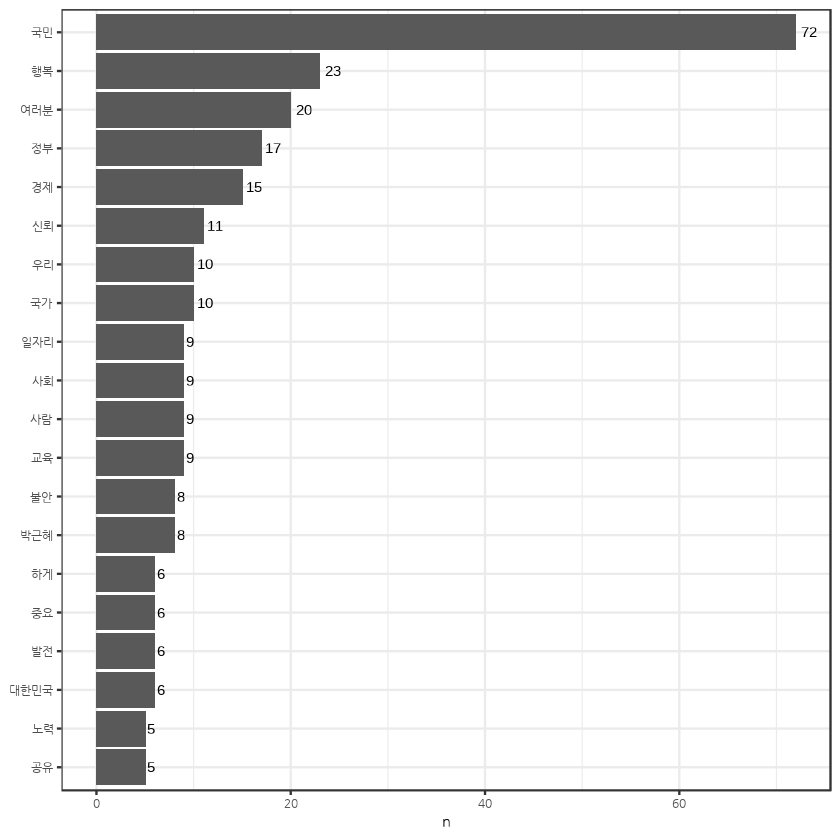

In [34]:
ggplot(top20) + geom_col(aes(fct_reorder(word, n), n)) + coord_flip() +
    geom_text(aes(word, n, label = n), hjust = -0.3) + 
    theme(text = element_text(family = "nanumgothic"),
         axis.title.y = element_blank())

### Q4

In [37]:
park <- raw_park %>%
    str_replace_all("[^가-힣]", " ") %>%
    str_squish() %>%
    as_tibble() %>%
    unnest_tokens(input = value,
                 output = sentence,
                 token = "sentences")

In [39]:
park %>% print

# A tibble: 49 x 1
   sentence                                                                     
   <chr>                                                                        
 1 존경하는 국민 여러분 저는 오늘 국민 한 분 한 분의 꿈이 이루어지는 행복한 대~ 
 2 국민 여러분 저의 삶은 대한민국과 함께 해온 시간이었습니다 우리나라가 가난을 ~
 3 어머니가 흉탄에 돌아가신 후 견딜 수 없는 고통과 어려움 속에서도 그 힘든 시간~
 4 그때부터 제 삶은 완전히 다른 길을 가야했습니다 개인의 삶 대신 국민과 함께 하~
 5 아버지를 잃는 또 다른 고통과 아픔을 겪고 저는 평범한 삶을 살고자 했습니다 하~
 6 당이 두 번이나 존폐의 위기를 맞고 국민들의 불신이 쌓이고 원성이 높아졌을 때 ~
 7 저 박근혜 그 동안의 제 삶이 저 혼자만의 삶이 아니라 국민 여러분의 신뢰와 성~ 
 8 어떤 국민도 홀로 뒤처져 있지 않게 할 것입니다 단 한명이라도 포기하지 않고 같~
 9 국민 여러분 우리는 지금 중요한 기로에 서 있습니다 세계적으로 경기는 침체되고~
10 지금 우리 국민들은 불안합니다 청년들은 일자리가 없어서 불안하고 직장이 있는 ~
# ... with 39 more rows


### Q5

In [41]:
park %>% filter(str_detect(sentence, "경제")) %>% print

# A tibble: 8 x 1
  sentence                                                                      
  <chr>                                                                         
1 그동안 정권이 여러 번 교체되었지만 국민들의 불안은 나아지지 않았습니다 국가는~
2 저는 경제민주화 실현 일자리 창출 그리고 한국형 복지의 확립 을 국민행복을 위한~
3 그동안 우리 경제는 효율성을 지나치게 강조하면서 공정성의 중요성을 간과하였고 ~
4 공정하고 투명한 시장경제 질서를 확립해 경제민주화를 실현하는 일은 시대적 과제~
5 수출 일변도의 경제구조에서 벗어나 수출과 내수가 동시에 성장을 견인하는 쌍끌이~
6 국민행복의 길을 열어갈 세 번째 과제로 우리의 실정에 맞으면서 국민에게 실질적~ 
7 국민 여러분 올해는 우리나라 경제발전의 틀을 마련한 경제개발 개년 계획을 시작~ 
8 모든 계층의 국민이 함께 참여해 만들고 정부와 기업 지역사회가 함께 연대해 실천~
